<h1 style="font-size:3rem;color:orange;">Directing User Subscriptions</h1>

<h2 style="font-size:2rem;color:orange;">EDA (Exploratory Data Analysis) and Feature Engineering</h2>

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from dateutil import parser

### Import Data

In [3]:
df_users = pd.read_csv("data/app-user-data.csv")

### Raw Data Peek

In [4]:
df_users.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
df_users.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [6]:
# Check for null values
df_users.isnull()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,True,False
49997,False,False,False,False,False,False,False,False,False,False,True,False
49998,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Replace as needed
df_users["enrolled_date"].fillna(0)

0                              0
1                              0
2                              0
3        2013-07-05 16:11:49.513
4        2013-02-26 18:56:37.841
                  ...           
49995    2013-05-09 13:47:52.875
49996                          0
49997                          0
49998    2013-04-28 12:35:38.709
49999                          0
Name: enrolled_date, Length: 50000, dtype: object

In [8]:
# Convert the hour parameter to a string to extract what we want, then convert to type int
df_users["hour"] = df_users.hour.str.slice(1, 3).astype(int)

## Plotting

In [9]:
df_users_numerical = df_users.drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled']).copy()
df_users_numerical.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


## Histograms

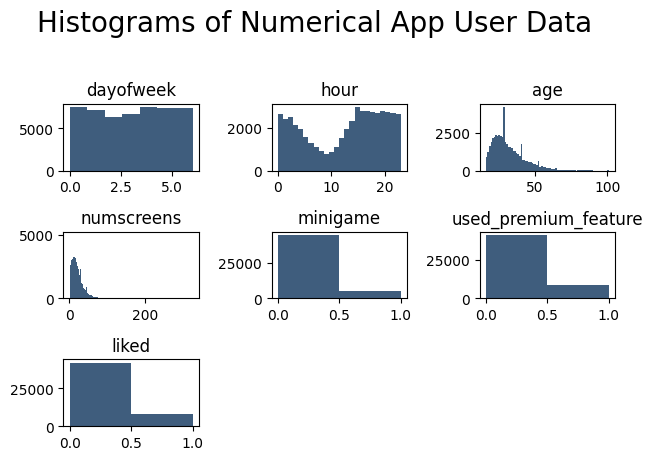

In [10]:
plt.suptitle('Histograms of Numerical App User Data', fontsize = 20)

for col in range(1, df_users_numerical.shape[1]+1):
    plt.subplot(3, 3, col)
    feat = plt.gca()
    feat.set_title(df_users_numerical.columns.values[col-1])
    vals = np.size(df_users_numerical.iloc[:, col-1].unique())
    plt.hist(df_users_numerical.iloc[:, col - 1], bins=vals, color='#3F5D7D')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Correlation with Response

<Axes: title={'center': 'Estimated Correlation with Subscription Enrollment'}>

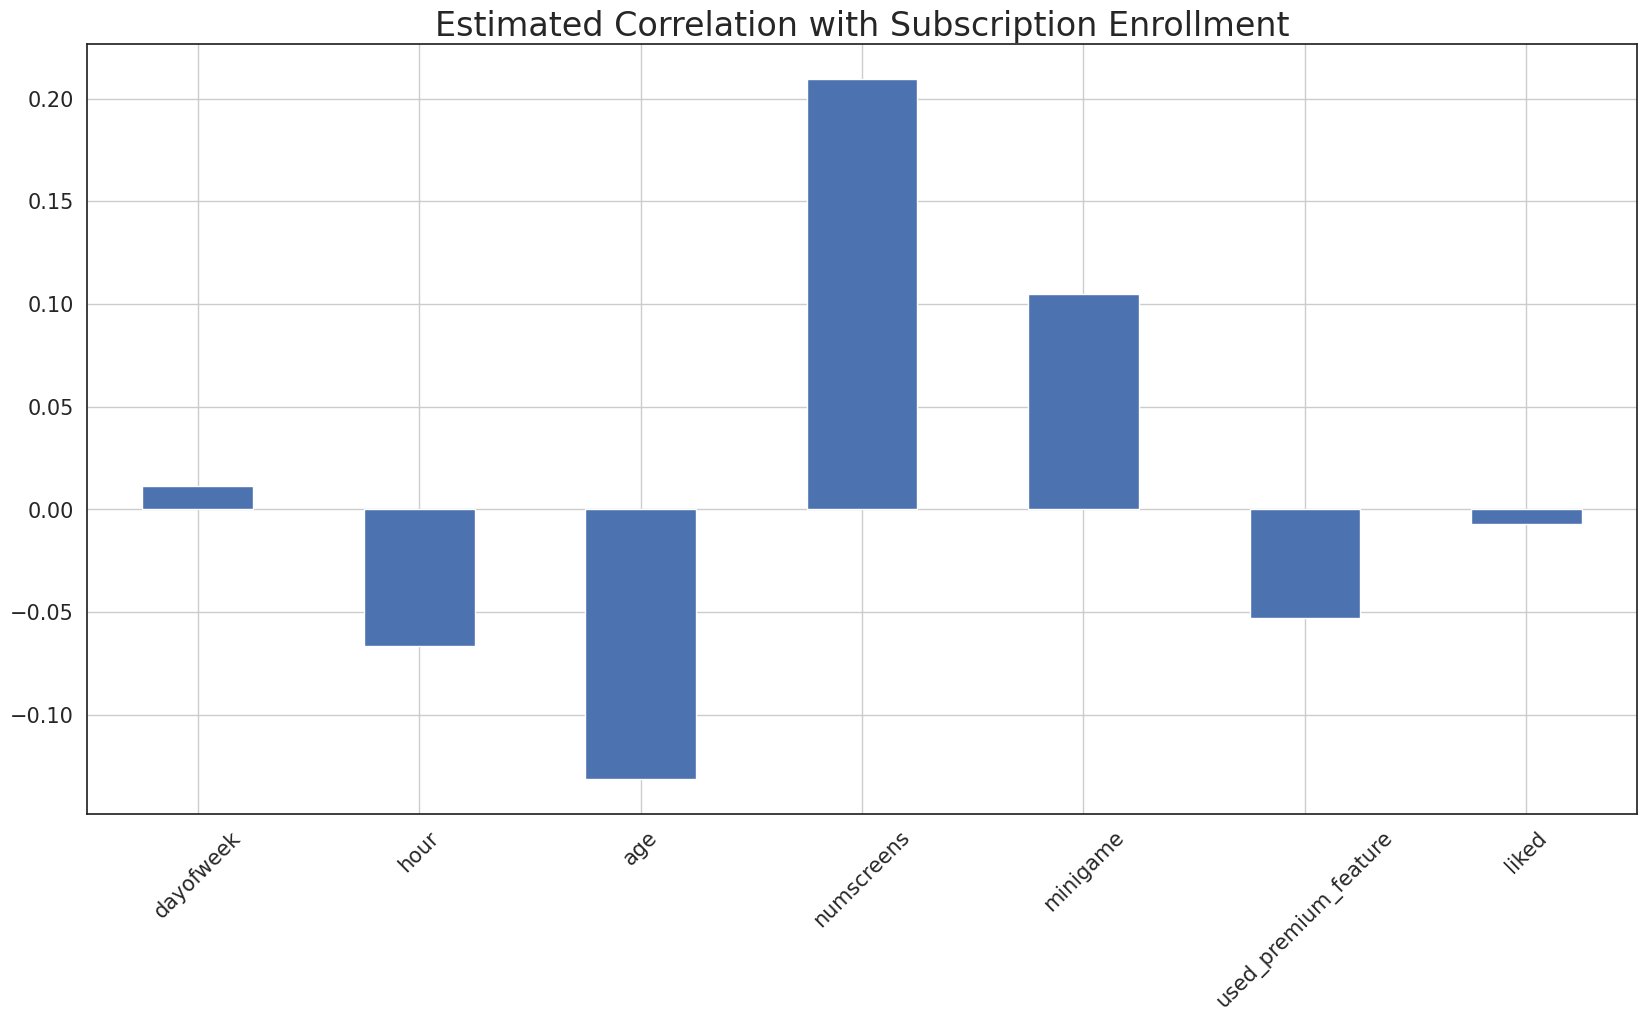

In [13]:
# Evaluate estimated correlations with paid subscription enrollments
df_users_numerical.corrwith(df_users.enrolled).plot.bar(figsize = (20, 10), 
                                                        title = 'Estimated Correlation with Subscription Enrollment', 
                                                        fontsize = 15, 
                                                        rot = 45, 
                                                        grid = True)

## Correlation Matrix

<Axes: >

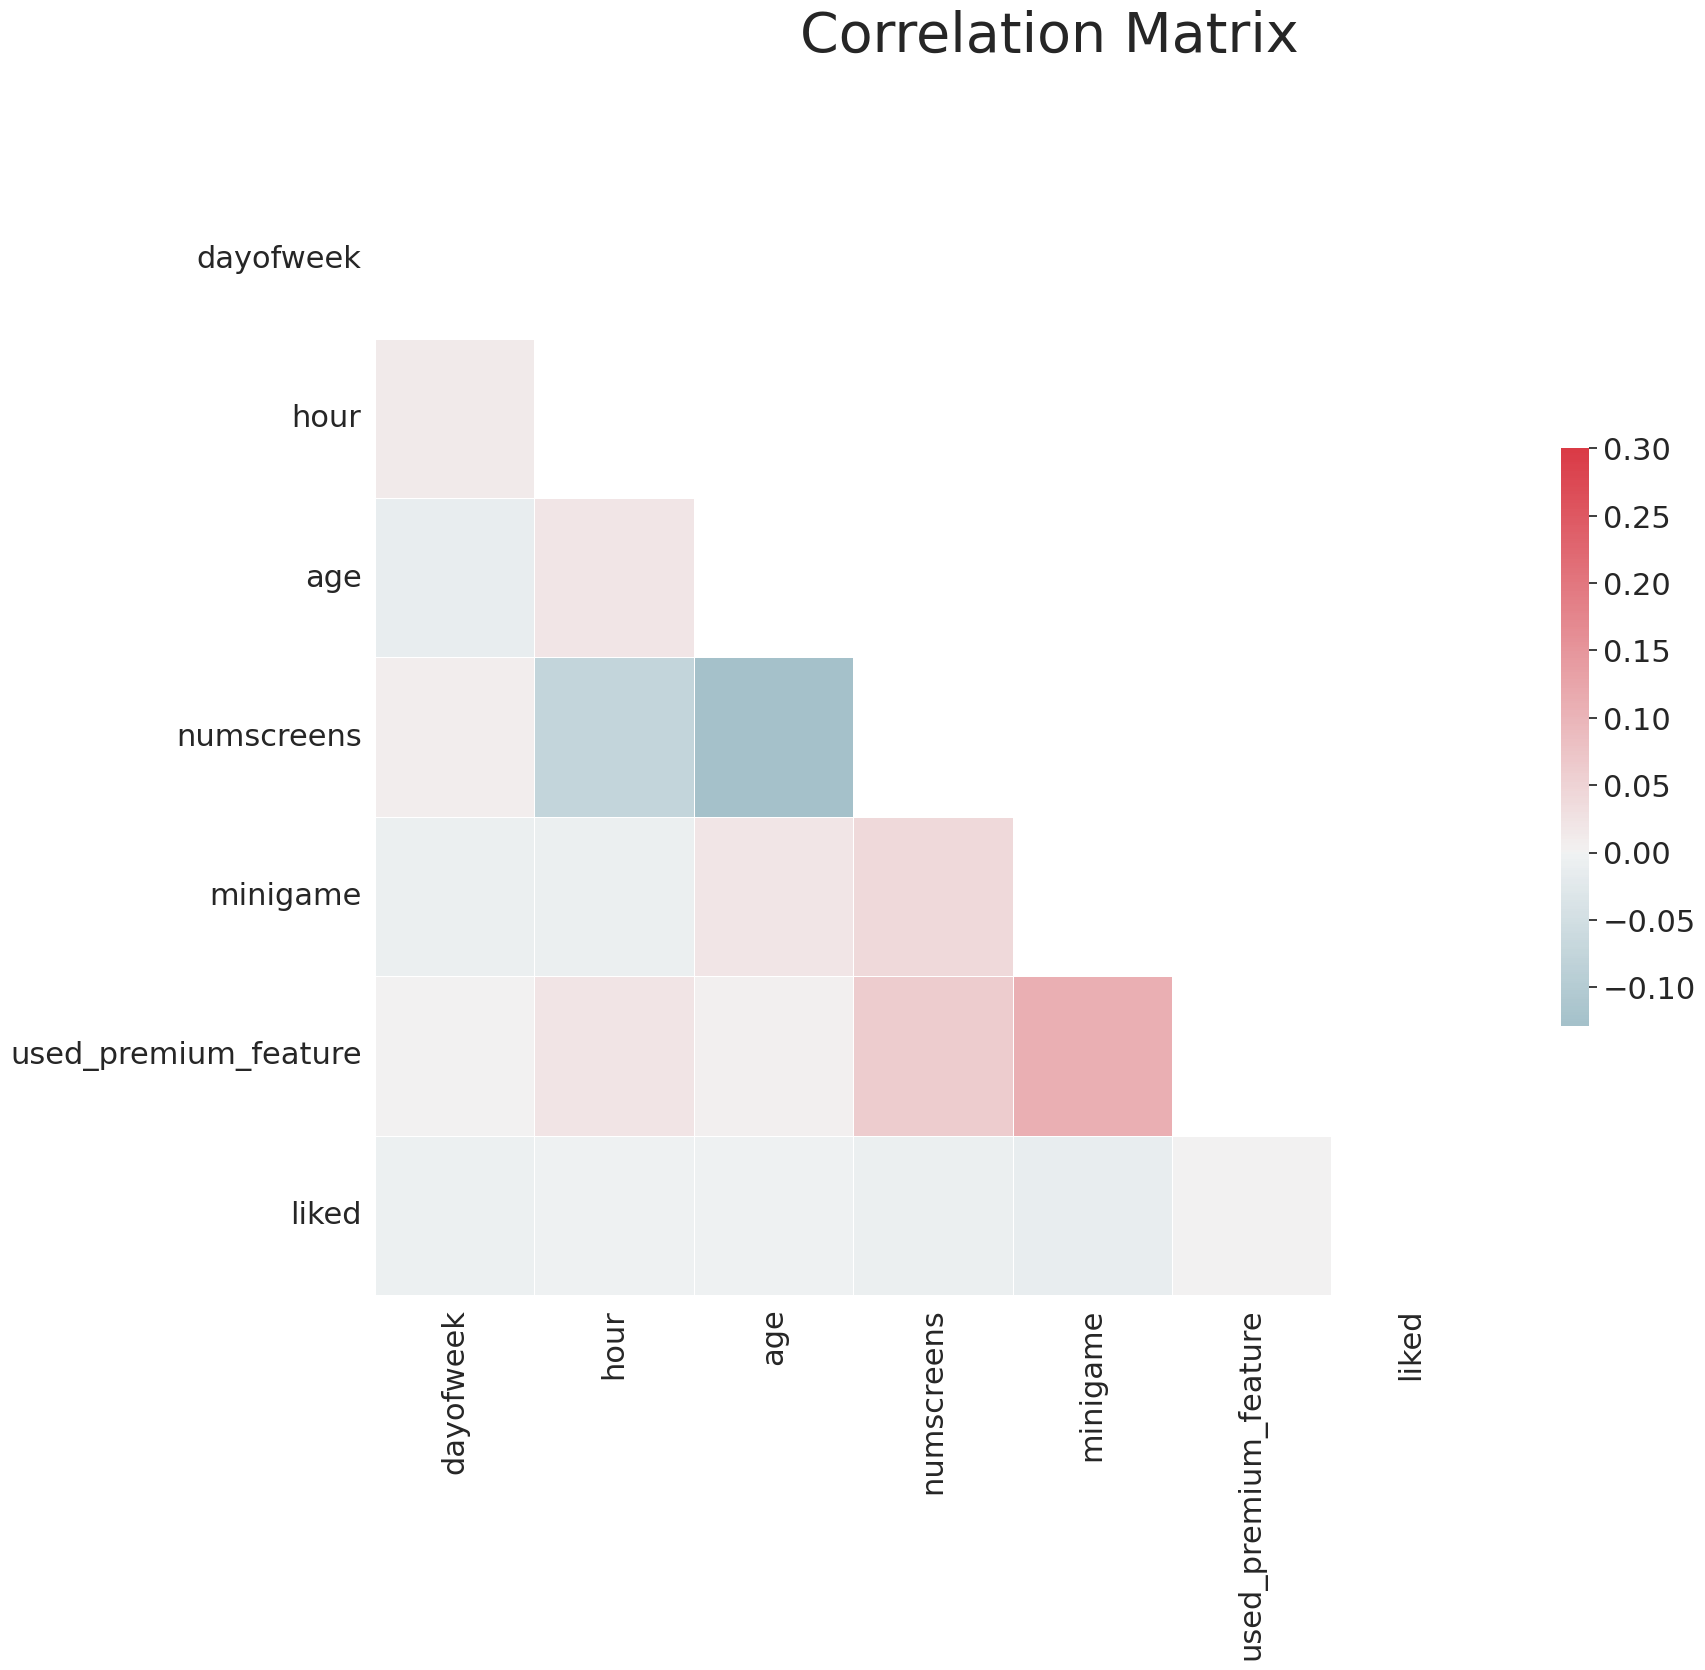

In [12]:
# Estimate fields that are positively and negatively correlated to each other, checking for linear dependence

# Seaborn 
sn.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = df_users_numerical.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})